In [1]:
import numpy as np 
import pandas as pd
import os
import joblib
import sklearn 
import matplotlib
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split

#Regressions:

from sklearn.multioutput import MultiOutputRegressor

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

#Metric
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


from pandas import DataFrame


# Show progress bar
from tqdm import tqdm

In [2]:
df = pd.read_csv('flo_dataset_augmented.csv')
df

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,in_amount_mmol,p_amount_mmol,ligand_amount_mmol,first_sol_amount_ml,second_sol_amount_ml,other_1_amount_mmol,...,x6_None,x6_copper bromide,x6_oleic acid,x6_trioctylphosphine,x6_water,x6_zinc iodide,diameter_nm,abs_nm,emission_nm,Unnamed: 79
0,0,0,0,0,0.154575,-0.011188,-0.247025,-0.673379,-0.370637,0.865472,...,1,0,0,0,0,0,1.500,480.0,539.000000,59.000000
1,1,1,1,1,0.195883,0.280681,-0.439228,-0.658075,-0.370637,-0.675365,...,1,0,0,0,0,0,2.610,610.0,622.333333,12.333333
2,2,2,2,2,-0.423738,-0.412509,-0.439228,-0.655198,-0.370637,0.457150,...,1,0,0,0,0,0,2.930,560.0,595.000000,35.000000
3,3,3,3,3,-0.423738,-0.412509,-0.439228,-0.655198,-0.370637,0.457150,...,1,0,0,0,0,0,3.275,590.0,635.000000,45.000000
4,4,4,4,4,0.154575,-0.011188,-0.247025,-0.604513,-0.370637,0.865472,...,1,0,0,0,0,0,1.500,429.5,500.000000,70.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,199,214,214,214,0.154575,-0.376755,0.713993,4.491519,-0.370637,-0.675365,...,1,0,0,0,0,0,4.000,585.0,630.000000,45.000000
200,200,215,215,215,7.590031,7.504453,-0.439228,5.524499,-0.370637,-0.675365,...,1,0,0,0,0,0,2.200,465.0,550.000000,85.000000
201,201,216,216,216,2.633061,0.718486,4.173657,6.213152,4.521657,-0.675365,...,1,0,0,0,0,0,2.100,465.0,578.333333,113.333333
202,202,217,217,217,2.633061,0.718486,4.173657,6.213152,4.521657,-0.675365,...,1,0,0,0,0,0,2.700,495.0,578.333333,83.333333


In [3]:
# Input for ML models

input_col =  ['in_amount_mmol', 'p_amount_mmol', 'ligand_amount_mmol',
       'first_sol_amount_ml', 'second_sol_amount_ml', 
       'other_1_amount_mmol', 'other_2_amount_mmol', 'total_volume_ml',
       'temp_c', 'time_min', 'x0_chloroindium oxalate', 'x0_indium acetate',
       'x0_indium bromide', 'x0_indium chloride', 'x0_indium iodide',
       'x0_indium myristate', 'x0_indium oxalate', 'x0_indium palmitate',
       'x0_indium trifluoroacetate',
       'x0_indium tris(N,N-diisopropylacetamidinato)',
       'x1_bis(trimethylsilyl)phosphine', 'x1_phosphine gas',
       'x1_phosphorus trichloride', 'x1_sodium phosphide',
       'x1_tris(diethylamino)phosphine', 'x1_tris(dimethylamino)phosphine',
       'x1_tris(trimethylgermyl)phosphine', 'x1_tris(trimethylsilyl)phosphine',
       'x1_white phosphorus', 'x2_None', 'x2_dodecanethiol', 'x2_lauric acid',
       'x2_myristic acid', 'x2_oleic acid', 'x2_palmitic acid',
       'x2_stearic acid', 'x3_4-ethylpyridine', 'x3_None',
       'x3_dimethylformamide', 'x3_dodecylamine', 'x3_mesitylene',
       'x3_octadecene', 'x3_oleylamine', 'x3_trioctylamine',
       'x3_trioctylphosphine', 'x3_trioctylphosphine oxide', 'x4_None',
       'x4_dioctyl ether', 'x4_dioctylamine', 'x4_hexadecylamine',
       'x4_octylamine', 'x4_oleylamine', 'x4_toluene', 'x4_trioctylphosphine',
       'x4_trioctylphosphine oxide', 
       'x5_None', 'x5_acetic acid', 'x5_superhydride',
       'x5_tetrabutylammonium myristate', 'x5_zinc acetate', 'x5_zinc bromide',
       'x5_zinc chloride', 'x5_zinc iodide', 'x5_zinc octanoate',
       'x5_zinc oleate', 'x5_zinc stearate', 'x5_zinc undecylenate', 'x6_None',
       'x6_copper bromide', 'x6_oleic acid','x6_trioctylphosphine',  'x6_water', 'x6_zinc iodide']

#Three individual outputs:
diameter = ['diameter_nm']
emission = ['emission_nm']
absorbance = ['abs_nm']

#Splitting dataset

X = df[input_col]

Y_d = df[diameter]
Y_e = df[emission]
Y_a = df[absorbance]


X_train_d, X_test_d, Y_train_d, Y_test_d = train_test_split(X, Y_d, test_size=0.15, random_state=45, shuffle=True)
X_train_e, X_test_e, Y_train_e, Y_test_e = train_test_split(X, Y_e, test_size=0.15, random_state=45, shuffle=True)
X_train_a, X_test_a, Y_train_a, Y_test_a = train_test_split(X, Y_a, test_size=0.15, random_state=45, shuffle=True)

## D - Optimizing diameter model


### 1D. Extra Trees

In [9]:
# This is a grid search for three parameters in the Extra Trees algorithm. 
# Parameters are: random_state, n_estimators, max_features.

# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 25)):
    for j in range(1, 25):
        for k in range(2, 40, 1):
            ET_regr = ExtraTreesRegressor(n_estimators=i, 
                                            max_features=j,
                                            random_state=k)
            
            ET_regr.fit(X_train_d, np.ravel(Y_train_d))
            ET_Y_pred_d = pd.DataFrame(ET_regr.predict(X_test_d))

            mae = mean_absolute_error(Y_test_d, ET_Y_pred_d)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 24/24 [05:34<00:00, 13.95s/it]

0.2740322580645161 1 7 21


### 2D. Decision Tree 

In [5]:
# This is a grid search for three parameters in the Decision Trees algorithm. 
# Parameters are: max_depth, max_features, random_state.
# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999

min_i, min_j, min_k  = 0, 0, 0

for i in tqdm(range(1, 30)):
    for j in range(1, 30):
        for k in range(4, 80, 2):
            
            DT_regr = DecisionTreeRegressor(max_depth=i,
                                max_features=j,
                                random_state=k)
            
            DT_regr.fit(X_train_d, np.ravel(Y_train_d))
            DT_Y_pred_d = pd.DataFrame(DT_regr.predict(X_test_d))

            mae = mean_absolute_error(Y_test_d, DT_Y_pred_d)
            
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 29/29 [02:47<00:00,  5.78s/it]

0.25443548387096776 12 23 22


### 3D. Random Forest

In [6]:
# This is a grid search for three parameters in the Random Forest algorithm. 
# Parameters are: max_depth, n_estimators, max_features.
# Random_state is set to 45.
# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 31)):
    for j in range(1, 31):
        for k in range(2, 50, 1):
            RF_regr = RandomForestRegressor(max_depth=i, 
                                            n_estimators=j, 
                                            max_features=k,
                                            random_state=45)
            RF_regr.fit(X_train_d, np.ravel(Y_train_d))
            RF_Y_pred_d = pd.DataFrame(RF_regr.predict(X_test_d))

            mae = mean_absolute_error(Y_test_d, RF_Y_pred_d)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 30/30 [16:41<00:00, 33.38s/it]

0.3275806451612904 17 1 19


### 4D. K Neighbors

In [7]:
min_mae = 99999
min_i, min_j = 0, 0

for i in tqdm(range(1, 40)):
    for j in range(1, 40):

        KNN_reg_d = KNeighborsRegressor(n_neighbors=i, 
                                      p=j).fit(X_train_d, np.ravel(Y_train_d))

        KNN_Y_pred_d = KNN_reg_d.predict(X_test_d)

        mae = mean_absolute_error(Y_test_d, KNN_Y_pred_d)

        if (min_mae > mae):
            min_mae = mae
            min_i = i
            min_j = j

print(min_mae, min_i, min_j)

100%|██████████| 39/39 [00:19<00:00,  2.03it/s]

0.6514516129032258 1 23


### Saving Decision Tree model

In [19]:
DT_regr_d = DecisionTreeRegressor(max_depth=12,
                                max_features=23,
                                random_state=22)
DT_regr_d.fit(X_train_d, np.ravel(Y_train_d))
DT_Y_pred_d = pd.DataFrame(DT_regr_d.predict(X_test_d))
joblib.dump(DT_regr_d, "./model_SO_diameter_DecisionTree.joblib")

['./model_SO_diameter_DecisionTree.joblib']

## E - Optimizing emission model


### 1E. Extra Trees

In [11]:
# This is a grid search for three parameters in the Extra Trees algorithm. 
# Parameters are: random_state, n_estimators, max_features.

# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 25)):
    for j in range(1, 25):
        for k in range(2, 50, 1):
            ET_regr_e = ExtraTreesRegressor(n_estimators=i, 
                                            max_features=j,
                                            random_state=k)
            
            ET_regr_e.fit(X_train_e, np.ravel(Y_train_e))
            ET_Y_pred_e = pd.DataFrame(ET_regr_e.predict(X_test_e))

            mae = mean_absolute_error(Y_test_e, ET_Y_pred_e)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 24/24 [07:36<00:00, 19.03s/it]

10.617204298978491 20 21 23


### 2E. Decision Trees

In [12]:
# This is a grid search for three parameters in the Decision Trees algorithm. 

# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999

min_i, min_j, min_k  = 0, 0, 0

for i in tqdm(range(1, 30)):
    for j in range(1, 30):
        for k in range(4, 50, 2):
            
            DT_regr_e = DecisionTreeRegressor(max_depth=i,
                                max_features=j,
                                random_state=k)
            
            DT_regr_e.fit(X_train_e, np.ravel(Y_train_e))
            DT_Y_pred_e = pd.DataFrame(DT_regr_e.predict(X_test_e))

            mae = mean_absolute_error(Y_test_e, DT_Y_pred_e)
            
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 29/29 [01:49<00:00,  3.78s/it]

11.41621864129032 14 23 30


### 3E. Random Forest

In [13]:
min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 31)):
    for j in range(1, 31):
        for k in range(2, 50, 1):
            RF_regr_e = RandomForestRegressor(max_depth=i, 
                                            n_estimators=j, 
                                            max_features=k,
                                            random_state=45)
            RF_regr_e.fit(X_train_e, np.ravel(Y_train_e))
            RF_Y_pred_e = pd.DataFrame(RF_regr_e.predict(X_test_e))

            mae = mean_absolute_error(Y_test_e, RF_Y_pred_e)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 30/30 [17:34<00:00, 35.15s/it]

13.00092833242585 11 6 29


### 4E. K Neighbors

In [14]:
min_mae = 99999
min_i, min_j = 0, 0

for i in tqdm(range(1, 40)):
    for j in range(1, 40):

        KNN_reg_e = KNeighborsRegressor(n_neighbors=i, 
                                      p=j).fit(X_train_e, np.ravel(Y_train_e))

        KNN_Y_pred_e = KNN_reg_e.predict(X_test_e)

        mae = mean_absolute_error(Y_test_e, KNN_Y_pred_e)

        if (min_mae > mae):
            min_mae = mae
            min_i = i
            min_j = j

print(min_mae, min_i, min_j)

100%|██████████| 39/39 [00:21<00:00,  1.80it/s]

21.010752690322576 2 3


### Saving Extra Trees model

In [20]:
ET_regr_e = ExtraTreesRegressor(n_estimators=20,
                            max_features=21,     
                            random_state=23).fit(X_train_e, np.ravel(Y_train_e))
                  
ET_Y_pred_e = ET_regr_e.predict(X_test_e)

joblib.dump(ET_regr_e, "./model_SO_emission_ExtraTrees.joblib")

['./model_SO_emission_ExtraTrees.joblib']

## A - Optimizing absorption model


### 1A: Extra Trees

In [15]:
# This is a grid search for three parameters in the Extra Trees algorithm. 
# Parameters are: random_state, n_estimators, max_features.

# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 30)):
    for j in range(1, 30):
        for k in range(2, 50, 1):
            ET_regr_a = ExtraTreesRegressor(n_estimators=i, 
                                            max_features=j,
                                            random_state=k)
            
            ET_regr_a.fit(X_train_a, np.ravel(Y_train_a))
            ET_Y_pred_a = pd.DataFrame(ET_regr_a.predict(X_test_a))

            mae = mean_absolute_error(Y_test_a, ET_Y_pred_a)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 29/29 [13:46<00:00, 28.50s/it]

16.462365591397855 6 29 24


### 2A. Decision Trees


In [16]:
# This is a grid search for three parameters in the Decision Trees algorithm. 

# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999

min_i, min_j, min_k  = 0, 0, 0

for i in tqdm(range(1, 30)):
    for j in range(1, 30):
        for k in range(4, 80, 2):
            
            DT_regr_a = DecisionTreeRegressor(max_depth=i,
                                max_features=j,
                                random_state=k)
            
            DT_regr_a.fit(X_train_a, np.ravel(Y_train_a))
            DT_Y_pred_a = pd.DataFrame(DT_regr_a.predict(X_test_a))

            mae = mean_absolute_error(Y_test_a, DT_Y_pred_a)
            
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 29/29 [03:13<00:00,  6.68s/it]

18.780645161290323 13 17 76


In [22]:
DT_regr_a = DecisionTreeRegressor(max_depth=20,
                                max_features=20,
                                random_state=12).fit(X_train_a, np.ravel(Y_train_a))
                  
DT_Y_pred_a = DT_regr_a.predict(X_test_a)


DT_r2_a = r2_score(Y_test_a, DT_Y_pred_a)
DT_MSE_a = mean_squared_error(Y_test_a, DT_Y_pred_a)
DT_RMSE_a = mean_squared_error(Y_test_a, DT_Y_pred_a, squared=False)
DT_MAE_a = mean_absolute_error(Y_test_a, DT_Y_pred_a)
print('diameter:', 'r2:', DT_r2_a, '; MSE:', DT_MSE_a, '; RMSE:', DT_RMSE_a, '; MAE:', DT_MAE_a)

diameter: r2: 0.7157594152974505 ; MSE: 1033.208754199327 ; RMSE: 32.14356474007398 ; MAE: 20.595959593939398


### 3A. Random Forest

In [17]:
min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 31)):
    for j in range(1, 31):
        for k in range(2, 50, 1):
            RF_regr_a = RandomForestRegressor(max_depth=i, 
                                            n_estimators=j, 
                                            max_features=k,
                                            random_state=45)
            RF_regr_a.fit(X_train_a, np.ravel(Y_train_a))
            RF_Y_pred_a = pd.DataFrame(RF_regr_a.predict(X_test_a))

            mae = mean_absolute_error(Y_test_a, RF_Y_pred_a)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 30/30 [18:12<00:00, 36.43s/it]

17.373281121237113 13 16 43


### 4A. K Neighbors

In [18]:
min_mae = 99999
min_i, min_j = 0, 0

for i in tqdm(range(1, 40)):
    for j in range(1, 40):

        KNN_reg_a = KNeighborsRegressor(n_neighbors=i, 
                                      p=j).fit(X_train_a, np.ravel(Y_train_a))

        KNN_Y_pred_a = KNN_reg_a.predict(X_test_a)

        mae = mean_absolute_error(Y_test_a, KNN_Y_pred_a)

        if (min_mae > mae):
            min_mae = mae
            min_i = i
            min_j = j

print(min_mae, min_i, min_j)

100%|██████████| 39/39 [00:19<00:00,  2.01it/s]

28.048387096774185 3 1


### Saving model

In [21]:
ET_regr_a = ExtraTreesRegressor(n_estimators=6, 
                                max_features=29,
                                random_state=24
                               )
            
ET_regr_a.fit(X_train_a, np.ravel(Y_train_a))
ET_Y_pred_a = pd.DataFrame(ET_regr_a.predict(X_test_a))

joblib.dump(ET_regr_a, "./model_SO_abs_ExtraTrees.joblib")

['./model_SO_abs_ExtraTrees.joblib']

## Analyzing

In [4]:
## Diameter

DT_regr_d = DecisionTreeRegressor(max_depth=12,
                                max_features=23,
                                random_state=22)
DT_regr_d.fit(X_train_d, np.ravel(Y_train_d))
DT_Y_pred_d = DT_regr_d.predict(X_test_d)

D_mae = mean_absolute_error(Y_test_d, DT_Y_pred_d)
D_r_2 = r2_score(Y_test_d, DT_Y_pred_d)
D_mse = mean_squared_error(Y_test_d, DT_Y_pred_d)
D_rmse = mean_squared_error(Y_test_d, DT_Y_pred_d, squared=False)

## Emission

ET_regr_e = ExtraTreesRegressor(n_estimators=20,
                            max_features=21,     
                            random_state=23).fit(X_train_e, np.ravel(Y_train_e))

                  
ET_Y_pred_e = ET_regr_e.predict(X_test_e)

E_mae = mean_absolute_error(Y_test_e, ET_Y_pred_e)
E_r_2 = r2_score(Y_test_e, ET_Y_pred_e)
E_mse = mean_squared_error(Y_test_e, ET_Y_pred_e)
E_rmse = mean_squared_error(Y_test_e, ET_Y_pred_e, squared=False)


### Absorption

ET_regr_a = ExtraTreesRegressor(n_estimators=6, 
                                max_features=29,
                                random_state=24)
ET_regr_a.fit(X_train_a, np.ravel(Y_train_a))
ET_Y_pred_a = ET_regr_a.predict(X_test_a)

A_mae = mean_absolute_error(Y_test_a, ET_Y_pred_a)
A_r_2 = r2_score(Y_test_a, ET_Y_pred_a)
A_mse = mean_squared_error(Y_test_a, ET_Y_pred_a)
A_rmse = mean_squared_error(Y_test_a, ET_Y_pred_a, squared=False)


from tabulate import tabulate

d = [ ["Diameter", D_r_2, D_mae, D_mse, D_rmse],
     ["Absorption", A_r_2, A_mae, A_mse, A_rmse],
     ["Emission", E_r_2, E_mae, E_mse, E_rmse]]

print(tabulate(d, headers=["Outputs", "R2", "Mean absolute error", "Mean squared error", "Root mean squared error"]))

Outputs           R2    Mean absolute error    Mean squared error    Root mean squared error
----------  --------  ---------------------  --------------------  -------------------------
Diameter    0.95207                0.254435              0.158734                   0.398414
Absorption  0.702763              16.4624              571.828                     23.9129
Emission    0.786619              10.6172              275.206                     16.5893


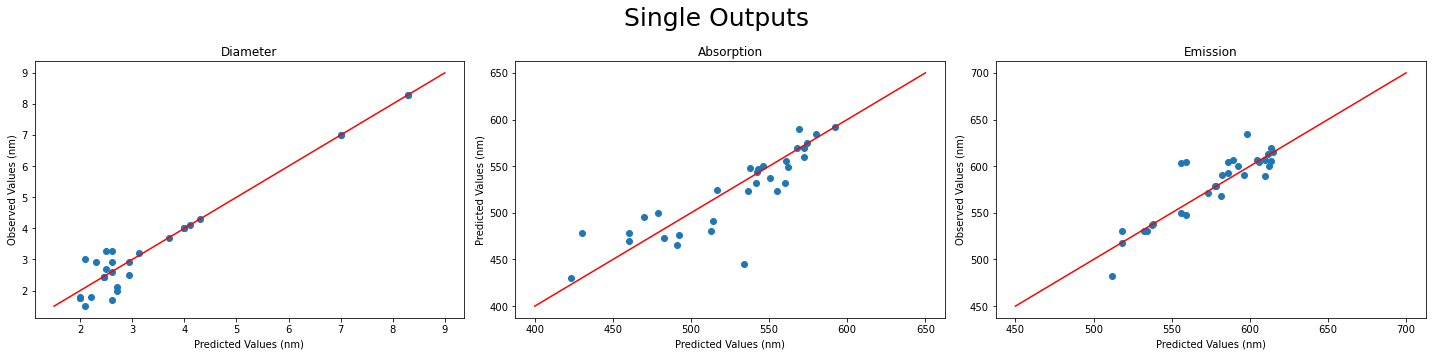

In [5]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,5))
fig.suptitle('Single Outputs', fontsize=25)

ax1.plot(DT_Y_pred_d, Y_test_d, 'o')
ax1.plot([1.5,9],[1.5,9], color = 'r')
ax1.set_title('Diameter')
ax1.set(xlabel='Predicted Values (nm)', ylabel='Observed Values (nm)')

ax2.plot(ET_Y_pred_a, Y_test_a, 'o')
ax2.plot([400,650],[400,650], color = 'r')
ax2.set_title('Absorption')
ax2.set(xlabel='Predicted Values (nm)', ylabel='Predicted Values (nm)')

ax3.plot(ET_Y_pred_e, Y_test_e, 'o')
ax3.plot([450,700],[450,700], color = 'r')
ax3.set_title('Emission')
ax3.set(xlabel='Predicted Values (nm)', ylabel='Observed Values (nm)')


fig.tight_layout()

## Feature importance

### For diameter prediction

In [6]:
importance_dict_d = dict()
for i in range(0,71):
    importance_dict_d[input_col[i]] = DT_regr_d.feature_importances_[i]

sorted_importance_d = sorted(importance_dict_d.items(), key=lambda x: x[1], reverse=True)

sorted_importance_d


[('x5_zinc iodide', 0.3052670698153883),
 ('x0_indium trifluoroacetate', 0.1653654926657311),
 ('other_1_amount_mmol', 0.08967160290033858),
 ('temp_c', 0.08403330807813783),
 ('time_min', 0.05457237680774586),
 ('x1_tris(trimethylsilyl)phosphine', 0.05101478766804962),
 ('in_amount_mmol', 0.04415474669726785),
 ('x4_dioctylamine', 0.03887589806763587),
 ('total_volume_ml', 0.029933808614350625),
 ('ligand_amount_mmol', 0.018220031148425735),
 ('x2_myristic acid', 0.015716634375352947),
 ('x4_trioctylphosphine oxide', 0.014896892543705787),
 ('p_amount_mmol', 0.01160987034827529),
 ('x1_phosphine gas', 0.01122600064616027),
 ('x0_indium acetate', 0.009194272373244989),
 ('x2_None', 0.008861976193847073),
 ('x5_zinc chloride', 0.007945098919703191),
 ('x3_trioctylamine', 0.007941581603565118),
 ('x5_zinc octanoate', 0.005827685962851741),
 ('x2_lauric acid', 0.004965938406036889),
 ('other_2_amount_mmol', 0.004590822886056407),
 ('x1_tris(diethylamino)phosphine', 0.0036494693282470175),

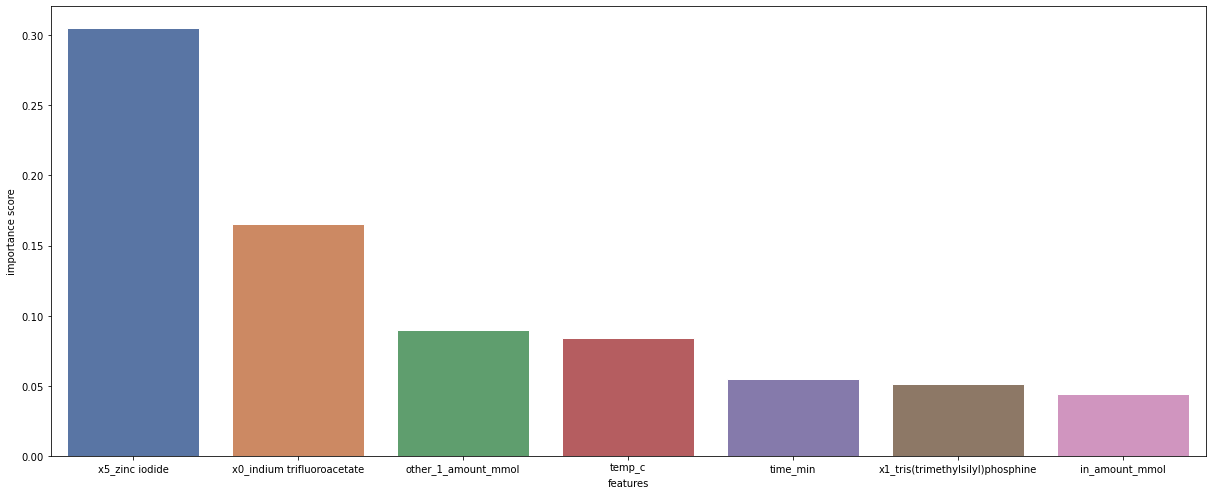

In [7]:
top7_d = DataFrame(sorted_importance_d[0:7], columns=['features', 'importance score'])

others_d = DataFrame(sorted_importance_d[7:], columns=['features', 'importance score'])


import seaborn as sns

a4_dims = (20.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.set_theme(style="whitegrid")

ax = sns.barplot(x="features", y="importance score", data=top7_d)

### Emission prediction

In [8]:
importance_dict_e = dict()
for i in range(0,71):
    importance_dict_e[input_col[i]] = ET_regr_e.feature_importances_[i]

sorted_importance_e = sorted(importance_dict_e.items(), key=lambda x: x[1], reverse=True)


sorted_importance_e


[('x4_trioctylphosphine oxide', 0.12704269997954157),
 ('temp_c', 0.12267759362136675),
 ('time_min', 0.08661944328526898),
 ('x5_zinc oleate', 0.07748706313681301),
 ('x5_zinc iodide', 0.056432231675025965),
 ('x5_None', 0.04337157481666639),
 ('x0_indium oxalate', 0.04005206203994747),
 ('x3_trioctylphosphine', 0.039514974383175965),
 ('x6_None', 0.03610703812778626),
 ('p_amount_mmol', 0.025213044029373587),
 ('x2_dodecanethiol', 0.024241935510960284),
 ('in_amount_mmol', 0.023046042764721008),
 ('other_1_amount_mmol', 0.01809213217867161),
 ('x4_dioctylamine', 0.016740277569371242),
 ('ligand_amount_mmol', 0.016273862189606022),
 ('x5_zinc bromide', 0.015636404726747724),
 ('total_volume_ml', 0.015116135027852194),
 ('second_sol_amount_ml', 0.012560204425753478),
 ('x2_stearic acid', 0.011885692326123173),
 ('x2_myristic acid', 0.01184857058122952),
 ('x0_indium iodide', 0.011372683296153398),
 ('first_sol_amount_ml', 0.010878530575961444),
 ('x5_zinc chloride', 0.01062296733753676

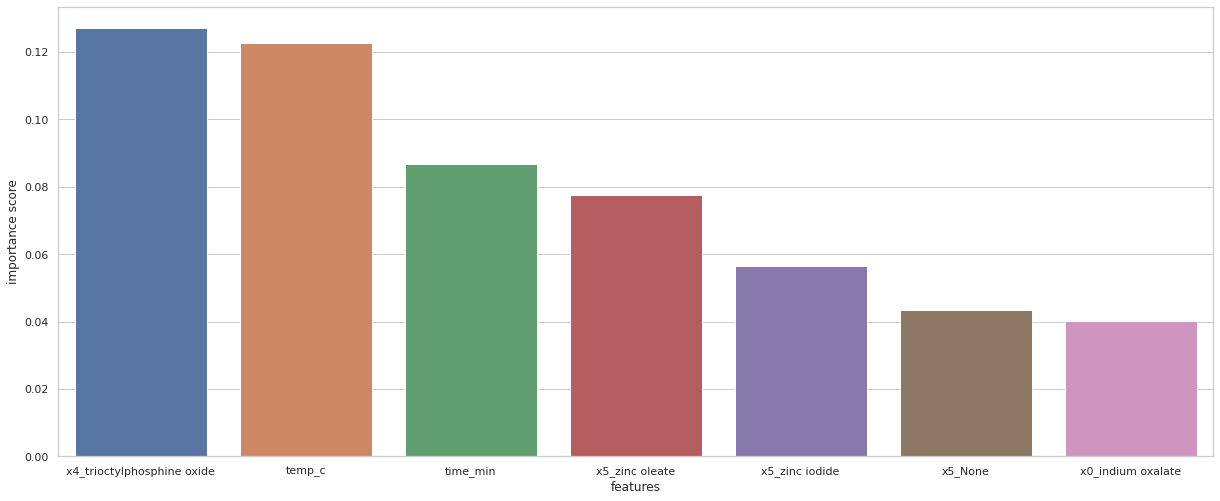

In [9]:
top7_e = DataFrame(sorted_importance_e[0:7], columns=['features', 'importance score'])

others_e = DataFrame(sorted_importance_e[7:], columns=['features', 'importance score'])

# combined_others2 = pd.DataFrame(data = {
#     'features' : ['others'],
#     'importance score' : [others2['importance score'].sum()]
# })

# #combining top 10 with others
# imp_score2 = pd.concat([top7, combined_others2])

import seaborn as sns

a4_dims = (20.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.set_theme(style="whitegrid")

ax = sns.barplot(x="features", y="importance score", data=top7_e)

### Absorption prediction

In [10]:
importance_dict_a = dict()
for i in range(0,71):
    importance_dict_a[input_col[i]] = ET_regr_a.feature_importances_[i]

sorted_importance_a = sorted(importance_dict_a.items(), key=lambda x: x[1], reverse=True)

sorted_importance_a

[('temp_c', 0.15533722408035391),
 ('time_min', 0.14054543088472385),
 ('x4_trioctylphosphine oxide', 0.06581724934875703),
 ('x5_zinc iodide', 0.05335473952742189),
 ('x2_dodecanethiol', 0.050875728891396986),
 ('x5_zinc oleate', 0.0466272228318089),
 ('x6_None', 0.038170951361949625),
 ('p_amount_mmol', 0.03400101681162822),
 ('x5_None', 0.03188870211182555),
 ('x5_zinc octanoate', 0.025535006379135933),
 ('in_amount_mmol', 0.023371787785380616),
 ('x5_zinc chloride', 0.01883371063523948),
 ('x0_indium oxalate', 0.01749325754745755),
 ('second_sol_amount_ml', 0.017187718408767986),
 ('x5_zinc bromide', 0.015966508958115088),
 ('x4_None', 0.014840388473106323),
 ('other_1_amount_mmol', 0.014583112876565942),
 ('total_volume_ml', 0.014161779748855257),
 ('ligand_amount_mmol', 0.013876341374132996),
 ('x2_stearic acid', 0.012775235971876249),
 ('other_2_amount_mmol', 0.012560012743884517),
 ('x5_acetic acid', 0.011945529188517151),
 ('x1_phosphorus trichloride', 0.010639694231750582),
 

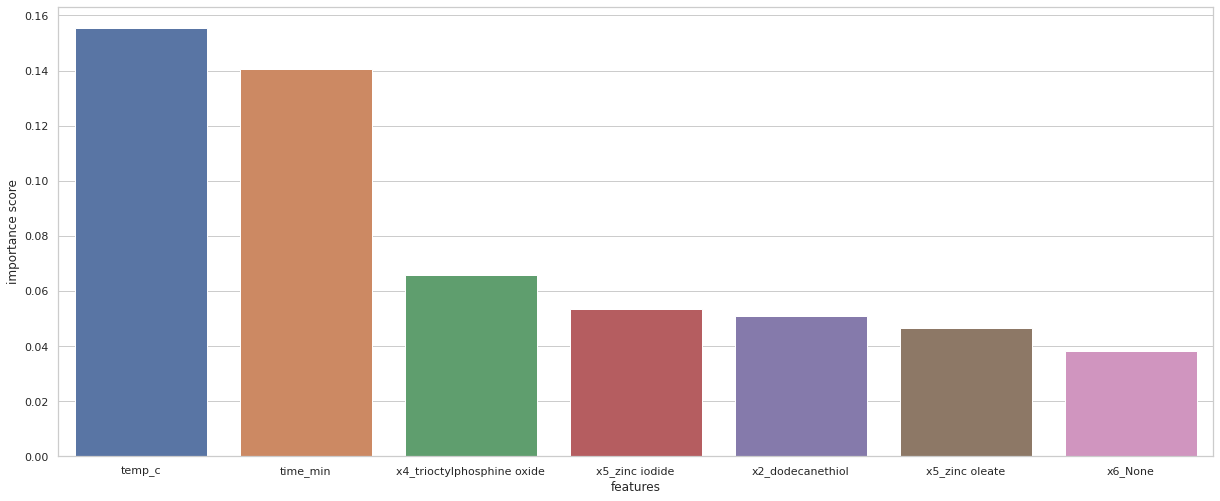

In [11]:
top7_a = DataFrame(sorted_importance_a[0:7], columns=['features', 'importance score'])

others_a = DataFrame(sorted_importance_a[7:], columns=['features', 'importance score'])

import seaborn as sns

a4_dims = (20.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.set_theme(style="whitegrid")

ax = sns.barplot(x="features", y="importance score", data=top7_a)

In [12]:
importance_dict_a

{'in_amount_mmol': 0.023371787785380616,
 'p_amount_mmol': 0.03400101681162822,
 'ligand_amount_mmol': 0.013876341374132996,
 'first_sol_amount_ml': 0.0065768853104172485,
 'second_sol_amount_ml': 0.017187718408767986,
 'other_1_amount_mmol': 0.014583112876565942,
 'other_2_amount_mmol': 0.012560012743884517,
 'total_volume_ml': 0.014161779748855257,
 'temp_c': 0.15533722408035391,
 'time_min': 0.14054543088472385,
 'x0_chloroindium oxalate': 0.003790680895146753,
 'x0_indium acetate': 0.00769489382940147,
 'x0_indium bromide': 8.741634485416113e-05,
 'x0_indium chloride': 0.005285672574651412,
 'x0_indium iodide': 0.008472446672259472,
 'x0_indium myristate': 0.0008720499944080412,
 'x0_indium oxalate': 0.01749325754745755,
 'x0_indium palmitate': 0.0014185803813684152,
 'x0_indium trifluoroacetate': 0.0019808167232147865,
 'x0_indium tris(N,N-diisopropylacetamidinato)': 0.0006321560791400757,
 'x1_bis(trimethylsilyl)phosphine': 2.5561122193761018e-05,
 'x1_phosphine gas': 0.009936896

### Combine


In [13]:
sorted_a = sorted(importance_dict_a.items(), key=lambda x: x[0], reverse=False)
sorted_d = sorted(importance_dict_d.items(), key=lambda x: x[0], reverse=False)
sorted_e = sorted(importance_dict_e.items(), key=lambda x: x[0], reverse=False)


In [14]:
sorted_d 

[('first_sol_amount_ml', 0.0011376132983430488),
 ('in_amount_mmol', 0.04415474669726785),
 ('ligand_amount_mmol', 0.018220031148425735),
 ('other_1_amount_mmol', 0.08967160290033858),
 ('other_2_amount_mmol', 0.004590822886056407),
 ('p_amount_mmol', 0.01160987034827529),
 ('second_sol_amount_ml', 0.001055359883547528),
 ('temp_c', 0.08403330807813783),
 ('time_min', 0.05457237680774586),
 ('total_volume_ml', 0.029933808614350625),
 ('x0_chloroindium oxalate', 0.0),
 ('x0_indium acetate', 0.009194272373244989),
 ('x0_indium bromide', 0.0),
 ('x0_indium chloride', 0.0),
 ('x0_indium iodide', 0.00040633027657610934),
 ('x0_indium myristate', 0.00021194387883146021),
 ('x0_indium oxalate', 0.0),
 ('x0_indium palmitate', 0.002043518806832377),
 ('x0_indium trifluoroacetate', 0.1653654926657311),
 ('x0_indium tris(N,N-diisopropylacetamidinato)', 0.0),
 ('x1_bis(trimethylsilyl)phosphine', 0.0),
 ('x1_phosphine gas', 0.01122600064616027),
 ('x1_phosphorus trichloride', 0.0),
 ('x1_sodium pho

In [15]:
combined_importance = dict()

In [16]:
for i in range(0,71):
    combined_importance[sorted_e[i][0]] = sorted_e[i][1] + sorted_a[i][1] + sorted_d[i][1]
combined_importance


{'first_sol_amount_ml': 0.018593029184721742,
 'in_amount_mmol': 0.09057257724736947,
 'ligand_amount_mmol': 0.048370234712164756,
 'other_1_amount_mmol': 0.12234684795557613,
 'other_2_amount_mmol': 0.021665838717656715,
 'p_amount_mmol': 0.0708239311892771,
 'second_sol_amount_ml': 0.03080328271806899,
 'temp_c': 0.36204812577985845,
 'time_min': 0.28173725097773866,
 'total_volume_ml': 0.059211723391058076,
 'x0_chloroindium oxalate': 0.010786627396571765,
 'x0_indium acetate': 0.02372847159027873,
 'x0_indium bromide': 0.0010107767764582633,
 'x0_indium chloride': 0.011774233975877384,
 'x0_indium iodide': 0.02025146024498898,
 'x0_indium myristate': 0.0031975275676269033,
 'x0_indium oxalate': 0.05754531958740502,
 'x0_indium palmitate': 0.0034640385670332593,
 'x0_indium trifluoroacetate': 0.16839757250974352,
 'x0_indium tris(N,N-diisopropylacetamidinato)': 0.001529912237079141,
 'x1_bis(trimethylsilyl)phosphine': 0.0001988379399181536,
 'x1_phosphine gas': 0.022574468361304556,

In [17]:
sorted_combined_importance = sorted(combined_importance.items(), key=lambda x: x[1], reverse=True)

sorted_combined_importance 

[('x5_zinc iodide', 0.41505404101783616),
 ('temp_c', 0.36204812577985845),
 ('time_min', 0.28173725097773866),
 ('x4_trioctylphosphine oxide', 0.20775684187200438),
 ('x0_indium trifluoroacetate', 0.16839757250974352),
 ('x5_zinc oleate', 0.12411428596862192),
 ('other_1_amount_mmol', 0.12234684795557613),
 ('in_amount_mmol', 0.09057257724736947),
 ('x5_None', 0.07546347307739613),
 ('x2_dodecanethiol', 0.07511766440235727),
 ('x6_None', 0.07451284170103278),
 ('p_amount_mmol', 0.0708239311892771),
 ('x4_dioctylamine', 0.06452066374856573),
 ('x1_tris(trimethylsilyl)phosphine', 0.062242724809624304),
 ('total_volume_ml', 0.059211723391058076),
 ('x0_indium oxalate', 0.05754531958740502),
 ('ligand_amount_mmol', 0.048370234712164756),
 ('x3_trioctylphosphine', 0.040415520681405574),
 ('x5_zinc chloride', 0.03740177689247943),
 ('x5_zinc octanoate', 0.033343283214016375),
 ('x5_zinc bromide', 0.031602913684862816),
 ('second_sol_amount_ml', 0.03080328271806899),
 ('x2_myristic acid', 0.

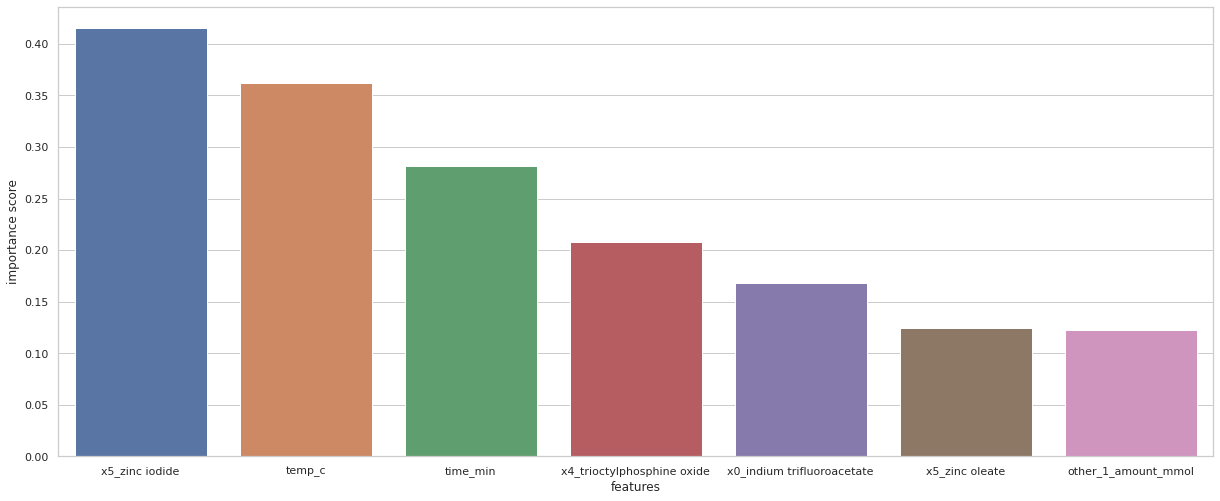

In [18]:
top7_combined = DataFrame(sorted_combined_importance[0:7], columns=['features', 'importance score'])

others_combined = DataFrame(sorted_combined_importance [7:], columns=['features', 'importance score'])

import seaborn as sns

a4_dims = (20.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.set_theme(style="whitegrid")

ax = sns.barplot(x="features", y="importance score", data=top7_combined)

In [20]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso